In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
# Pre testovanie musim vsetky skupiny dat do samostanych dataframov podla datumu
# CASI
casi_data_03_06_2022 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/CASI_03_06_2022_all_loc.csv')
casi_data_17_07_2022 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/CASI_17_07_2022_all_loc.csv')
casi_data_04_08_2022 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/CASI_04_08_2022_all_loc.csv')
casi_data_23_09_2022 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/CASI_23_09_2022_all_loc.csv')
casi_data_20_10_2022 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/CASI_20_10_2022_all_loc.csv')
casi_data_11_08_2023 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/CASI_11_08_2023_all_loc.csv')

# SASI
# Vyfiltrovanie dát pre vsetky dátumy
sasi_data_03_06_2022 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/SASI_03_06_2022_all_loc.csv')
sasi_data_17_07_2022 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/SASI_17_07_2022_all_loc.csv')
sasi_data_04_08_2022 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/SASI_04_08_2022_all_loc.csv')
sasi_data_23_09_2022 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/SASI_23_09_2022_all_loc.csv')
sasi_data_20_10_2022 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/SASI_20_10_2022_all_loc.csv')
sasi_data_11_08_2023 = pd.read_csv('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/ALL_LOCATION_by_DATE/SASI_11_08_2023_all_loc.csv')

In [118]:
# postup preberam z New_ANOVA_Tukey_tests_avg.ipynb
# Načítanie dát jednotlivo pre CASI a SASI pre kazdy datum
data = sasi_data_03_06_2022
data

,Unnamed: 0,CLASS_NAME,Group,b_49_1077.5,b_50_1092.5,b_51_1107.5,b_52_1122.5,b_53_1137.5,b_54_1152.5,b_55_1167.5,...,b_131_2307.5,b_132_2322.5,b_133_2337.5,b_134_2352.5,b_135_2367.5,b_136_2382.5,b_137_2397.5,b_138_2412.5,b_139_2427.5,b_140_2442.5
0,0,1D8,Control,1437,1396,1342,1267,1148,997,936,...,42,39,40,44,41,45,46,49,59,85
1,1,1D8,Control,1813,1768,1709,1626,1490,1315,1255,...,77,75,72,69,67,69,73,76,90,113
2,2,1D8,Control,1434,1395,1344,1274,1160,1015,960,...,58,53,53,53,53,58,54,58,74,85
3,3,1D8,Control,1764,1718,1658,1573,1436,1263,1199,...,77,75,72,75,75,72,78,76,90,97
4,4,1D8,Control,2313,2252,2172,2061,1880,1651,1567,...,101,96,97,96,91,94,94,94,124,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,199,8A4,Edge,2823,2757,2672,2553,2355,2103,2024,...,155,143,140,138,135,134,133,142,157,159
979,200,8A5,Edge,1875,1830,1773,1696,1569,1409,1356,...,122,112,113,117,114,115,116,117,138,143
980,201,8A5,Edge,2169,2115,2044,1944,1779,1569,1496,...,110,104,100,101,104,104,100,111,122,139
981,202,8A5,Edge,2074,2025,1962,1876,1736,1558,1500,...,120,114,115,113,111,112,111,120,130,147


In [119]:
# Odstránenie stĺpca 'CLASS_NAME' a 'Unnamed: 0'
data = data.drop(columns=['CLASS_NAME', 'Unnamed: 0'])

In [120]:
# Výpočet medianu pre každú a 'CLASS_NAME'
median_data = data.groupby(['Group']).median().reset_index()
median_data

,Group,b_49_1077.5,b_50_1092.5,b_51_1107.5,b_52_1122.5,b_53_1137.5,b_54_1152.5,b_55_1167.5,b_56_1182.5,b_57_1197.5,...,b_131_2307.5,b_132_2322.5,b_133_2337.5,b_134_2352.5,b_135_2367.5,b_136_2382.5,b_137_2397.5,b_138_2412.5,b_139_2427.5,b_140_2442.5
0,Control,2156.0,2099.0,2030.0,1930.0,1756.0,1535.0,1454.0,1374.0,1329.0,...,87.0,82.0,80.0,81.0,78.0,81.0,81.0,83.0,99.0,114.0
1,Edge,2089.0,2037.0,1962.0,1863.0,1706.0,1513.0,1437.0,1367.0,1322.0,...,98.0,91.0,91.0,91.0,89.0,93.0,94.0,100.0,118.0,135.0
2,Interior,2036.0,1982.0,1908.0,1809.0,1652.5,1447.5,1376.0,1300.5,1253.5,...,86.5,82.0,80.5,82.0,80.0,81.0,82.0,86.0,99.0,114.0
3,Roof,1927.0,1878.0,1812.0,1726.0,1580.0,1393.0,1327.0,1268.0,1219.0,...,88.0,81.0,81.0,81.0,77.0,81.0,81.0,87.0,102.0,114.0


In [121]:
# We need to melt the dataframe to have "long-form" data for seaborn to create histograms.
melted_data = median_data.melt(id_vars=["Group"], var_name="Wavelength", value_name="Reflectance")
melted_data

,Group,Wavelength,Reflectance
0,Control,b_49_1077.5,2156.0
1,Edge,b_49_1077.5,2089.0
2,Interior,b_49_1077.5,2036.0
3,Roof,b_49_1077.5,1927.0
4,Control,b_50_1092.5,2099.0
...,...,...,...
363,Roof,b_139_2427.5,102.0
364,Control,b_140_2442.5,114.0
365,Edge,b_140_2442.5,135.0
366,Interior,b_140_2442.5,114.0


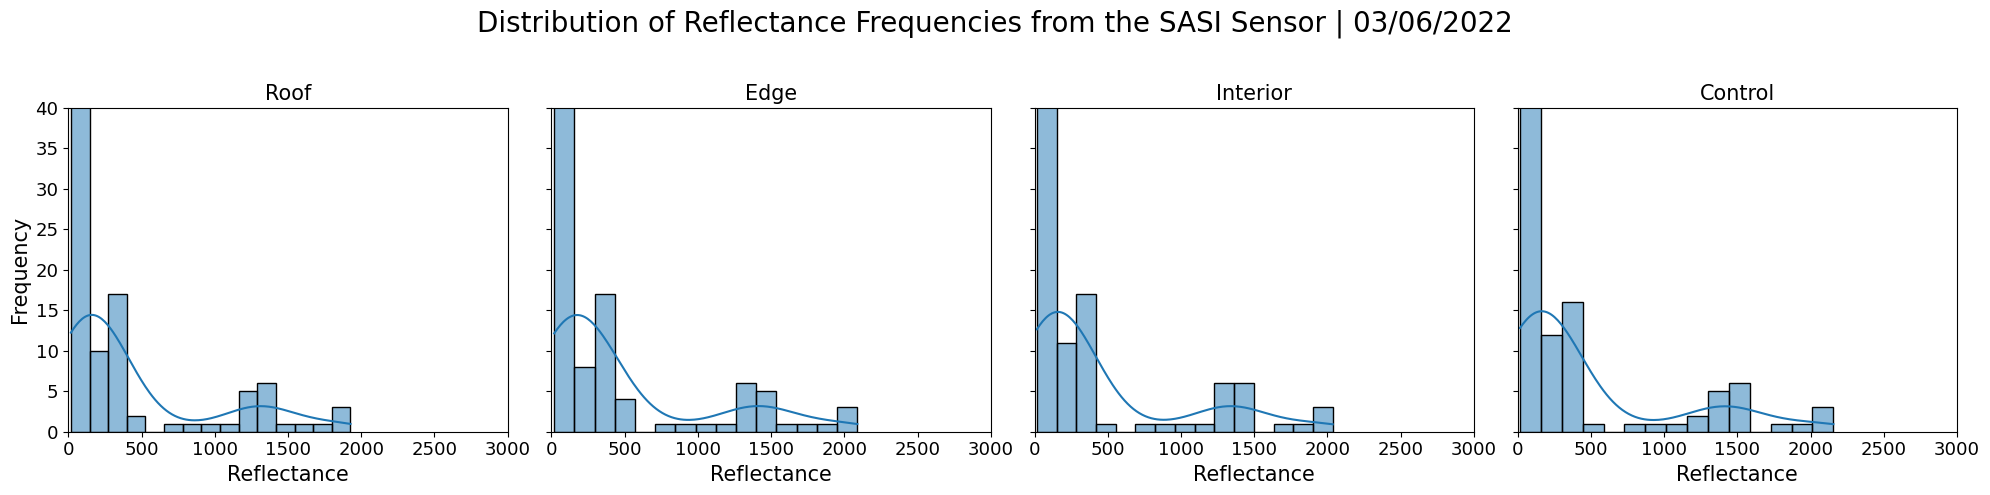

In [124]:
# Explicitne zadefinujeme poradie pre class_names
class_names = ['Roof', 'Edge', 'Interior', 'Control']

# Nastavíme veľkosť matplotlib obrázka
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5), sharex=True, sharey=True)

# Plochá iterácia cez axes
axes_flat = axes.flatten()

# Titulok pre všetky štyri grafy s väčším písmom
plt.suptitle('Distribution of Reflectance Frequencies from the SASI Sensor | 03/06/2022', fontsize=20)

# Iterujeme cez každé unikátne meno triedy pre vytvorenie histogramu
for i, class_name in enumerate(class_names):
    # Filter dát pre každú triedu
    class_data = melted_data[melted_data['Group'] == class_name]
    sns.histplot(class_data['Reflectance'], bins = 15, kde=True, ax=axes_flat[i])
    # Názvy podgrafů s väčším písmom
    axes_flat[i].set_title(f'{class_name}', fontsize=15)
    
     # Nastavíme veľkosť písma pre názvy osí a čísla (tick labels)
    axes_flat[i].set_xlabel('Reflectance', fontsize=15)  # Veľkosť názvu x osi
    axes_flat[i].set_ylabel('Frequency', fontsize=15)  # Veľkosť názvu y osi
    axes_flat[i].tick_params(axis='both', labelsize=13)  # Veľkosť čísel na oboch osiach

# Nastavenie rozsahu x osi na každom grafe
    axes_flat[i].set_xlim(0, 3000)
    axes_flat[i].set_ylim(0, 40)
# Upravíme rozloženie, aby nedošlo k prekryvu, pričom zohľadníme aj nadpis
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Zobrazíme grafy
plt.savefig('C:/Users/matus/Downloads/Kostelec_finland/28_03_2023_vsetko/Testy/Distribution_KDE/SASI_03_06_2022.png')
plt.show()
